# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCFanIn/InitialTestMultiPattern.cfg'
data_path = './results'
simulation_name = 'TestMFGoCPlasticity10'
simulation_time = 100
analysis_time = 10.0
analysis_step = 10.0
time_bin = 0.125
run_the_simulation = True
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 12345
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['goclayer']['cm'] = 50.0e-12
simulation.config_options['goclayer']['grest'] = 3.0e-9
simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIFSym'
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgocsynapsis']['average_number_of_source_cells'] = 2000.0
simulation.config_options['mfgocsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 6.0e-11
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 6.5e-11
simulation.config_options['mfgocsynapsis']['weight_recording'] = True
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
simulation.config_options['mfgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgocsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgocsynapsis']['minus_plus_ratio'] = 1.46
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgocsynapsis']['max_weight'] = 7.0e-10
# Set the GoC-GoC connectivity rules and parameters
simulation.config_options['gocgocsynapsis']['connectivity_type'] = 'random_with_probability'
simulation.config_options['gocgocsynapsis']['connection_probability'] = 1.0
# Set the MF-GrC learning rule and initial weights
simulation.config_options['gocgocsynapsis']['weight_initialization_type'] = 'fixed'
#simulation.config_options['gocgocsynapsis']['initial_weight'] = -1.0e-11
simulation.config_options['gocgocsynapsis']['initial_weight'] = -0.0e-10
simulation.config_options['gocgocsynapsis']['weight_recording'] = True
simulation.config_options['gocgocsynapsis']['weight_normalization'] = False
simulation.config_options['gocgocsynapsis']['learning_rule_type'] = 'STDPSym'
simulation.config_options['gocgocsynapsis']['tau_sym'] = 0.125
simulation.config_options['gocgocsynapsis']['learning_step'] = 5.0e-2
simulation.config_options['gocgocsynapsis']['minus_plus_ratio'] = 0.0
simulation.config_options['goclayer']['tau_istdp'] = 125.0e-3
simulation.config_options['gocgocsynapsis']['max_weight'] = -7.0e-10


Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'goclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['individual_mutual_information']['time_bin'] = time_bin
simulation.config_options['hit_top_analysis']['layer'] = 'goclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 72
simulation.config_options['hit_top_analysis']['time_bin'] = time_bin

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['number_of_patterns'] = 2
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-07-03 15:55:35,013 - P3620 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 100s
2018-07-03 15:55:35,026 - P3620 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-07-03 15:55:35,091 - P3620 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-07-03 15:55:35,093 - P3620 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGoCPlasticity10
2018-07-03 15:55:35,096 - P3620 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-07-03 15:55:35,099 - P3620 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-07-03 15:55:35,116 - P3620 - MemTotal:87M - Simulation - DEBUG: Setting Global NEST Seed: 12356
2018-07-03 15:55:35,118 - P3620 - MemTotal:87M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366]
2018-07-03 15:55:35,120 - P3620 - MemTotal:87M - Simulation - WARNING: Non-specified cell model parameter: tau

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


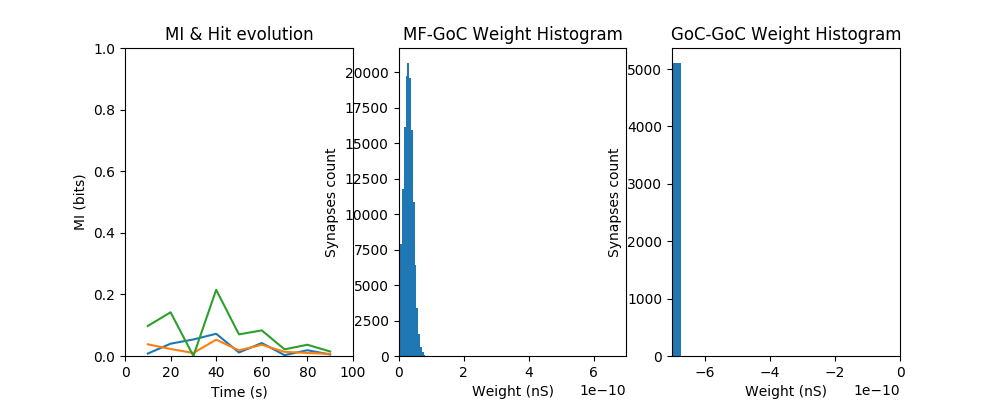

2018-07-03 15:55:37,526 - P3620 - MemTotal:433M - Simulation - INFO: Running the simulation from 0.0s until time 10.0s
2018-07-03 15:55:37,549 - P3620 - MemTotal:434M - Simulation - DEBUG: Running the simulation 0.177s until 0.177s


[-0. -0. -0. ... -0. -0. -0.]
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0. 5112.] [-7.0700e-10 -6.7165e-10 -6.3630e-10 -6.0095e-10 -5.6560e-10 -5.3025e-10
 -4.9490e-10 -4.5955e-10 -4.2420e-10 -3.8885e-10 -3.5350e-10 -3.1815e-10
 -2.8280e-10 -2.4745e-10 -2.1210e-10 -1.7675e-10 -1.4140e-10 -1.0605e-10
 -7.0700e-11 -3.5350e-11  0.0000e+00]


2018-07-03 15:55:37,844 - P3620 - MemTotal:434M - Simulation - DEBUG: Simulation time is 0.292499780655 seconds. Real-time rate: 0.6051286589128267
2018-07-03 15:55:37,861 - P3620 - MemTotal:434M - Simulation - DEBUG: Running the simulation 0.11299999999999999s until 0.29s
2018-07-03 15:55:38,003 - P3620 - MemTotal:434M - Simulation - DEBUG: Simulation time is 0.140445947647 seconds. Real-time rate: 0.804579996027657
2018-07-03 15:55:38,047 - P3620 - MemTotal:434M - Simulation - DEBUG: Running the simulation 0.964s until 1.254s
2018-07-03 15:55:39,171 - P3620 - MemTotal:434M - Simulation - DEBUG: Simulation time is 1.12278914452 seconds. Real-time rate: 0.858576166957473
2018-07-03 15:55:39,187 - P3620 - MemTotal:434M - Simulation - DEBUG: Running the simulation 0.3799999999999999s until 1.634s
2018-07-03 15:55:39,590 - P3620 - MemTotal:434M - Simulation - DEBUG: Simulation time is 0.400658130646 seconds. Real-time rate: 0.948439507236614
2018-07-03 15:55:39,606 - P3620 - MemTotal:434M

2018-07-03 15:55:47,095 - P3620 - MemTotal:434M - Simulation - DEBUG: Simulation time is 0.0833928585052 seconds. Real-time rate: 0.563597421199339
2018-07-03 15:55:47,112 - P3620 - MemTotal:434M - Simulation - DEBUG: Running the simulation 0.21699999999999964s until 7.672999999999999s
2018-07-03 15:55:47,383 - P3620 - MemTotal:434M - Simulation - DEBUG: Simulation time is 0.269114017487 seconds. Real-time rate: 0.8063496729999473
2018-07-03 15:55:47,399 - P3620 - MemTotal:434M - Simulation - DEBUG: Running the simulation 0.07000000000000028s until 7.742999999999999s
2018-07-03 15:55:47,474 - P3620 - MemTotal:434M - Simulation - DEBUG: Simulation time is 0.0738677978516 seconds. Real-time rate: 0.9476389175790164
2018-07-03 15:55:47,489 - P3620 - MemTotal:434M - Simulation - DEBUG: Running the simulation 0.03200000000000003s until 7.7749999999999995s
2018-07-03 15:55:47,525 - P3620 - MemTotal:434M - Simulation - DEBUG: Simulation time is 0.0341949462891 seconds. Real-time rate: 0.93581

2018-07-03 15:55:51,016 - P3620 - MemTotal:499M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-03 15:55:51,017 - P3620 - MemTotal:499M - Simulation - INFO: [[0.54166667 0.52083333 0.54166667 0.60416667 0.58333333 0.52083333
  0.70833333 0.625      0.625      0.5        0.58333333 0.625
  0.75       0.64583333 0.64583333 0.60416667 0.625      0.64583333
  0.625      0.5625     0.5625     0.54166667 0.5625     0.60416667
  0.66666667 0.52083333 0.60416667 0.54166667 0.54166667 0.625
  0.54166667 0.60416667 0.60416667 0.54166667 0.66666667 0.60416667
  0.66666667 0.54166667 0.58333333 0.66666667 0.60416667 0.625
  0.54166667 0.66666667 0.5        0.52083333 0.52083333 0.60416667
  0.58333333 0.58333333 0.58333333 0.58333333 0.60416667 0.6875
  0.66666667 0.58333333 0.60416667 0.5625     0.60416667 0.625
  0.5625     0.5625     0.5625     0.54166667 0.60416667 0.60416667
  0.54166667 0.52083333 0.625      0.64583333 0.52083333 0.64583333]
 [0.65957447 0.70212766 0.6595

2018-07-03 15:55:51,068 - P3620 - MemTotal:499M - Simulation - INFO: Individual pattern miss matrix:
2018-07-03 15:55:51,070 - P3620 - MemTotal:499M - Simulation - INFO: [[0.3125     0.3125     0.3125     0.46875    0.375      0.28125
  0.34375    0.375      0.40625    0.375      0.40625    0.4375
  0.46875    0.5        0.46875    0.40625    0.5        0.46875
  0.4375     0.4375     0.375      0.34375    0.3125     0.40625
  0.40625    0.28125    0.4375     0.34375    0.34375    0.375
  0.34375    0.3125     0.4375     0.34375    0.5        0.28125
  0.5        0.40625    0.375      0.5        0.40625    0.375
  0.40625    0.40625    0.28125    0.375      0.34375    0.28125
  0.40625    0.375      0.46875    0.375      0.40625    0.40625
  0.375      0.375      0.40625    0.375      0.375      0.46875
  0.40625    0.4375     0.34375    0.375      0.5        0.5
  0.34375    0.25       0.4375     0.40625    0.34375    0.375     ]
 [0.48484848 0.57575758 0.48484848 0.57575758 0.4848484

[-7.e-10 -7.e-10 -7.e-10 ... -7.e-10 -7.e-10 -7.e-10]


2018-07-03 15:55:52,311 - P3620 - MemTotal:499M - Simulation - INFO: Running the simulation from 10.0s until time 20.0s
2018-07-03 15:55:52,351 - P3620 - MemTotal:499M - Simulation - DEBUG: Running the simulation 0.021000000000000796s until 10.021s
2018-07-03 15:55:52,410 - P3620 - MemTotal:499M - Simulation - DEBUG: Simulation time is 0.0565679073334 seconds. Real-time rate: 0.3712352284174243
2018-07-03 15:55:52,436 - P3620 - MemTotal:499M - Simulation - DEBUG: Running the simulation 0.4499999999999993s until 10.471s
2018-07-03 15:55:53,063 - P3620 - MemTotal:499M - Simulation - DEBUG: Simulation time is 0.625622987747 seconds. Real-time rate: 0.7192830327741082
2018-07-03 15:55:53,080 - P3620 - MemTotal:499M - Simulation - DEBUG: Running the simulation 0.19699999999999918s until 10.668s
2018-07-03 15:55:53,296 - P3620 - MemTotal:499M - Simulation - DEBUG: Simulation time is 0.214605808258 seconds. Real-time rate: 0.9179621073587764
2018-07-03 15:55:53,312 - P3620 - MemTotal:499M - S

2018-07-03 15:56:00,296 - P3620 - MemTotal:499M - Simulation - DEBUG: Simulation time is 0.490062952042 seconds. Real-time rate: 0.8570327510991422
2018-07-03 15:56:00,313 - P3620 - MemTotal:499M - Simulation - DEBUG: Running the simulation 0.6550000000000011s until 16.762000000000004s
2018-07-03 15:56:01,043 - P3620 - MemTotal:499M - Simulation - DEBUG: Simulation time is 0.728492975235 seconds. Real-time rate: 0.8991164256439425
2018-07-03 15:56:01,061 - P3620 - MemTotal:499M - Simulation - DEBUG: Running the simulation 0.24599999999999866s until 17.008000000000003s
2018-07-03 15:56:01,372 - P3620 - MemTotal:499M - Simulation - DEBUG: Simulation time is 0.308786869049 seconds. Real-time rate: 0.7966660005898906
2018-07-03 15:56:01,387 - P3620 - MemTotal:499M - Simulation - DEBUG: Running the simulation 0.21399999999999864s until 17.222s
2018-07-03 15:56:01,661 - P3620 - MemTotal:499M - Simulation - DEBUG: Simulation time is 0.272224187851 seconds. Real-time rate: 0.7861167726843129
2

2018-07-03 15:56:06,311 - P3620 - MemTotal:502M - Simulation - INFO: Individual pattern miss matrix:
2018-07-03 15:56:06,312 - P3620 - MemTotal:502M - Simulation - INFO: [[0.9047619  0.85714286 1.         0.9047619  0.85714286 0.9047619
  1.         1.         1.         0.76190476 0.9047619  0.85714286
  0.76190476 1.         0.61904762 1.         0.80952381 1.
  0.85714286 1.         1.         1.         0.71428571 0.9047619
  0.9047619  0.9047619  1.         0.9047619  0.9047619  1.
  0.76190476 0.9047619  0.80952381 0.61904762 0.95238095 0.80952381
  0.95238095 0.71428571 0.9047619  0.9047619  0.95238095 0.9047619
  0.85714286 1.         0.71428571 0.80952381 0.66666667 0.61904762
  1.         0.80952381 0.9047619  0.9047619  0.80952381 0.9047619
  0.85714286 1.         0.85714286 0.9047619  1.         0.57142857
  0.71428571 0.85714286 0.52380952 0.95238095 0.57142857 0.9047619
  0.61904762 0.9047619  0.9047619  0.9047619  1.         1.        ]
 [0.72222222 0.72222222 0.72222222

2018-07-03 15:56:06,344 - P3620 - MemTotal:502M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-03 15:56:06,345 - P3620 - MemTotal:502M - Simulation - INFO: [[0.79661017 0.74576271 0.74576271 0.71186441 0.69491525 0.84745763
  0.83050847 0.79661017 0.74576271 0.69491525 0.77966102 0.76271186
  0.84745763 0.74576271 0.83050847 0.74576271 0.77966102 0.72881356
  0.77966102 0.72881356 0.76271186 0.77966102 0.83050847 0.76271186
  0.79661017 0.81355932 0.76271186 0.81355932 0.77966102 0.79661017
  0.81355932 0.74576271 0.76271186 0.77966102 0.83050847 0.88135593
  0.76271186 0.77966102 0.76271186 0.84745763 0.71186441 0.81355932
  0.72881356 0.77966102 0.88135593 0.74576271 0.72881356 0.83050847
  0.81355932 0.76271186 0.72881356 0.76271186 0.77966102 0.84745763
  0.77966102 0.79661017 0.71186441 0.76271186 0.74576271 0.79661017
  0.76271186 0.72881356 0.81355932 0.74576271 0.79661017 0.76271186
  0.84745763 0.84745763 0.81355932 0.84745763 0.72881356 0.79661017]


[-7.e-10 -7.e-10 -7.e-10 ... -7.e-10 -7.e-10 -7.e-10]


2018-07-03 15:56:07,527 - P3620 - MemTotal:501M - Simulation - INFO: Running the simulation from 20.0s until time 30.0s
2018-07-03 15:56:07,569 - P3620 - MemTotal:501M - Simulation - DEBUG: Running the simulation 0.22200000000000486s until 20.222000000000005s
2018-07-03 15:56:07,911 - P3620 - MemTotal:501M - Simulation - DEBUG: Simulation time is 0.339306116104 seconds. Real-time rate: 0.6542764467348349
2018-07-03 15:56:07,931 - P3620 - MemTotal:501M - Simulation - DEBUG: Running the simulation 0.2259999999999991s until 20.448000000000004s
2018-07-03 15:56:08,246 - P3620 - MemTotal:501M - Simulation - DEBUG: Simulation time is 0.313340187073 seconds. Real-time rate: 0.7212608191477352
2018-07-03 15:56:08,266 - P3620 - MemTotal:501M - Simulation - DEBUG: Running the simulation 0.2699999999999996s until 20.718000000000004s
2018-07-03 15:56:08,582 - P3620 - MemTotal:501M - Simulation - DEBUG: Simulation time is 0.314326047897 seconds. Real-time rate: 0.8589806724773363
2018-07-03 15:56:0

2018-07-03 15:56:14,780 - P3620 - MemTotal:501M - Simulation - DEBUG: Running the simulation 0.05699999999999861s until 25.542999999999996s
2018-07-03 15:56:14,843 - P3620 - MemTotal:501M - Simulation - DEBUG: Simulation time is 0.0613400936127 seconds. Real-time rate: 0.9292454028505792
2018-07-03 15:56:14,860 - P3620 - MemTotal:501M - Simulation - DEBUG: Running the simulation 0.5010000000000012s until 26.043999999999997s
2018-07-03 15:56:15,420 - P3620 - MemTotal:501M - Simulation - DEBUG: Simulation time is 0.558839082718 seconds. Real-time rate: 0.8965013641554993
2018-07-03 15:56:15,437 - P3620 - MemTotal:501M - Simulation - DEBUG: Running the simulation 0.3260000000000005s until 26.369999999999997s
2018-07-03 15:56:15,791 - P3620 - MemTotal:501M - Simulation - DEBUG: Simulation time is 0.352156877518 seconds. Real-time rate: 0.9257237919018493
2018-07-03 15:56:15,807 - P3620 - MemTotal:501M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 26.442999999999998

2018-07-03 15:56:21,309 - P3620 - MemTotal:503M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-03 15:56:21,311 - P3620 - MemTotal:503M - Simulation - INFO: [[0.97222222 0.97222222 0.95833333 0.95833333 0.94444444 0.94444444
  0.93055556 0.93055556 0.98611111 0.875      0.95833333 0.875
  0.97222222 0.95833333 0.91666667 0.94444444 0.98611111 0.95833333
  0.95833333 0.91666667 0.77777778 0.98611111 0.80555556 0.94444444
  0.93055556 0.98611111 0.95833333 0.90277778 0.94444444 0.94444444
  0.91666667 0.95833333 0.95833333 0.93055556 0.91666667 0.94444444
  0.93055556 0.95833333 0.95833333 0.97222222 0.93055556 0.875
  0.91666667 0.91666667 0.95833333 0.93055556 0.875      0.98611111
  0.95833333 0.98611111 0.90277778 0.97222222 0.93055556 0.98611111
  0.94444444 0.875      0.98611111 0.93055556 0.84722222 0.97222222
  0.90277778 0.93055556 0.94444444 0.98611111 0.97222222 0.94444444
  0.93055556 0.97222222 0.88888889 0.83333333 0.90277778 0.93055556]
 [0.949152

2018-07-03 15:56:21,330 - P3620 - MemTotal:503M - Simulation - INFO: Mutual information
2018-07-03 15:56:21,331 - P3620 - MemTotal:503M - Simulation - INFO: [0.02517959 0.00814289]
2018-07-03 15:56:21,333 - P3620 - MemTotal:503M - Simulation - INFO: Theoretical maximum of MI
2018-07-03 15:56:21,334 - P3620 - MemTotal:503M - Simulation - INFO: [0.46899559 0.83049552]
2018-07-03 15:56:21,336 - P3620 - MemTotal:503M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-03 15:56:21,339 - P3620 - MemTotal:503M - Simulation - INFO: Average firing rate in MI analysis: 0.6597222222222222Hz
2018-07-03 15:56:21,342 - P3620 - MemTotal:503M - Simulation - INFO: Individual pattern hit matrix:
2018-07-03 15:56:21,343 - P3620 - MemTotal:503M - Simulation - INFO: [[0.25       0.25       0.25       0.25       0.25       0.25
  0.25       0.25       0.125      0.375      0.25       0.25
  0.25       0.25       0.25       0.25       0.25       0.25
  0.125      0.25       0.25  

2018-07-03 15:56:21,360 - P3620 - MemTotal:503M - Simulation - DEBUG: Some patterns are not represented in the top cells
2018-07-03 15:56:21,361 - P3620 - MemTotal:503M - Simulation - INFO: Hit-false alarm of top-n index:0.0


[-7.e-10 -7.e-10 -7.e-10 ... -7.e-10 -7.e-10 -7.e-10]


2018-07-03 15:56:22,541 - P3620 - MemTotal:503M - Simulation - INFO: Running the simulation from 30.0s until time 40.0s
2018-07-03 15:56:22,577 - P3620 - MemTotal:503M - Simulation - DEBUG: Running the simulation 0.6239999999999988s until 30.624s
2018-07-03 15:56:23,411 - P3620 - MemTotal:503M - Simulation - DEBUG: Simulation time is 0.830976963043 seconds. Real-time rate: 0.750923344149974
2018-07-03 15:56:23,458 - P3620 - MemTotal:436M - Simulation - DEBUG: Running the simulation 0.1509999999999998s until 30.775s
2018-07-03 15:56:23,658 - P3620 - MemTotal:436M - Simulation - DEBUG: Simulation time is 0.198269128799 seconds. Real-time rate: 0.7615910803378052
2018-07-03 15:56:23,675 - P3620 - MemTotal:436M - Simulation - DEBUG: Running the simulation 0.053000000000000824s until 30.828s
2018-07-03 15:56:23,738 - P3620 - MemTotal:436M - Simulation - DEBUG: Simulation time is 0.0616998672485 seconds. Real-time rate: 0.8589969859499028
2018-07-03 15:56:23,755 - P3620 - MemTotal:436M - Sim

2018-07-03 15:56:31,461 - P3620 - MemTotal:436M - Simulation - DEBUG: Running the simulation 0.1700000000000017s until 36.74400000000001s
2018-07-03 15:56:31,679 - P3620 - MemTotal:436M - Simulation - DEBUG: Simulation time is 0.216648101807 seconds. Real-time rate: 0.784682619336898
2018-07-03 15:56:31,697 - P3620 - MemTotal:436M - Simulation - DEBUG: Running the simulation 0.5090000000000003s until 37.25300000000001s
2018-07-03 15:56:32,325 - P3620 - MemTotal:436M - Simulation - DEBUG: Simulation time is 0.62556385994 seconds. Real-time rate: 0.8136659302044175
2018-07-03 15:56:32,342 - P3620 - MemTotal:436M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 37.36600000000001s
2018-07-03 15:56:32,492 - P3620 - MemTotal:436M - Simulation - DEBUG: Simulation time is 0.147948980331 seconds. Real-time rate: 0.7637768083758871
2018-07-03 15:56:32,510 - P3620 - MemTotal:436M - Simulation - DEBUG: Running the simulation 0.060000000000002274s until 37.42600000000001s
201

2018-07-03 15:56:37,106 - P3620 - MemTotal:504M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-03 15:56:37,107 - P3620 - MemTotal:504M - Simulation - INFO: [[0.02941176 0.         0.05882353 0.01470588 0.         0.13235294
  0.05882353 0.05882353 0.01470588 0.16176471 0.07352941 0.16176471
  0.02941176 0.05882353 0.02941176 0.02941176 0.01470588 0.10294118
  0.         0.10294118 0.11764706 0.         0.23529412 0.02941176
  0.05882353 0.14705882 0.08823529 0.04411765 0.02941176 0.16176471
  0.13235294 0.         0.05882353 0.02941176 0.19117647 0.02941176
  0.01470588 0.         0.01470588 0.         0.11764706 0.13235294
  0.01470588 0.17647059 0.02941176 0.11764706 0.08823529 0.04411765
  0.01470588 0.08823529 0.         0.01470588 0.         0.01470588
  0.11764706 0.19117647 0.         0.07352941 0.05882353 0.02941176
  0.14705882 0.11764706 0.02941176 0.         0.         0.11764706
  0.07352941 0.         0.11764706 0.17647059 0.10294118 0.04411765]
 [0.03

2018-07-03 15:56:37,138 - P3620 - MemTotal:504M - Simulation - INFO: Individual pattern miss matrix:
2018-07-03 15:56:37,139 - P3620 - MemTotal:504M - Simulation - INFO: [[0.75       0.58333333 1.         1.         0.83333333 0.66666667
  0.58333333 0.83333333 1.         0.5        0.91666667 1.
  0.5        1.         1.         0.66666667 1.         0.83333333
  1.         1.         1.         1.         0.41666667 0.66666667
  0.58333333 0.41666667 1.         0.5        1.         1.
  0.83333333 1.         0.83333333 0.66666667 0.66666667 0.5
  0.83333333 1.         1.         1.         0.66666667 0.91666667
  0.91666667 1.         0.66666667 0.58333333 0.41666667 0.5
  1.         0.66666667 1.         0.5        0.91666667 1.
  0.91666667 0.58333333 1.         0.58333333 0.91666667 1.
  0.66666667 0.66666667 0.5        1.         0.83333333 0.91666667
  0.5        0.66666667 0.66666667 0.41666667 1.         1.        ]
 [0.8125     0.75       0.875      0.9375     0.9375     0.

[-7.e-10 -7.e-10 -7.e-10 ... -7.e-10 -7.e-10 -7.e-10]


2018-07-03 15:56:38,329 - P3620 - MemTotal:503M - Simulation - INFO: Running the simulation from 40.0s until time 50.0s
2018-07-03 15:56:38,359 - P3620 - MemTotal:503M - Simulation - DEBUG: Running the simulation 0.10700000000000642s until 40.107000000000006s
2018-07-03 15:56:38,599 - P3620 - MemTotal:503M - Simulation - DEBUG: Simulation time is 0.238139867783 seconds. Real-time rate: 0.44931577814467805
2018-07-03 15:56:38,623 - P3620 - MemTotal:503M - Simulation - DEBUG: Running the simulation 0.9159999999999968s until 41.023s
2018-07-03 15:56:39,870 - P3620 - MemTotal:503M - Simulation - DEBUG: Simulation time is 1.24432396889 seconds. Real-time rate: 0.7361426950724749
2018-07-03 15:56:39,892 - P3620 - MemTotal:503M - Simulation - DEBUG: Running the simulation 0.4480000000000004s until 41.471000000000004s
2018-07-03 15:56:40,447 - P3620 - MemTotal:503M - Simulation - DEBUG: Simulation time is 0.552734136581 seconds. Real-time rate: 0.8105162506712799
2018-07-03 15:56:40,464 - P362

2018-07-03 15:56:51,434 - P3620 - MemTotal:503M - Simulation - DEBUG: Simulation time is 0.507499217987 seconds. Real-time rate: 0.8197056965920356
2018-07-03 15:56:51,452 - P3620 - MemTotal:503M - Simulation - DEBUG: Running the simulation 0.3259999999999863s until 50.0s
2018-07-03 15:56:51,815 - P3620 - MemTotal:503M - Simulation - DEBUG: Simulation time is 0.361159086227 seconds. Real-time rate: 0.9026493100459018
2018-07-03 15:56:51,817 - P3620 - MemTotal:503M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-03 15:56:51,818 - P3620 - MemTotal:503M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 15:56:52,653 - P3620 - MemTotal:505M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-03 15:56:52,656 - P3620 - MemTotal:505M - Simulation - INFO: Analyzing mutual information from time 40.0 to 50.0 seconds
2018-07-03 15:56:52,658 - P3620 - MemTotal:5

2018-07-03 15:56:52,679 - P3620 - MemTotal:505M - Simulation - DEBUG: Joint shannon entropy: [[0.81482016 0.81482016 0.81482016 0.81482016 0.81482016 0.81482016
  0.81482016 0.81482016 1.08101969 0.88227817 0.81482016 1.28959603
  0.81482016 0.81482016 0.81482016 0.81482016 1.08101969 0.81482016
  0.81482016 0.81482016 0.81482016 0.81482016 0.92353304 0.81482016
  0.81482016 0.94988397 0.81482016 0.81482016 0.81482016 0.81482016
  0.81482016 0.81482016 1.22213802 0.72192809 0.81482016 0.72192809
  0.81482016 0.81482016 0.81482016 1.2788979  0.95406261 0.81482016
  0.81482016 0.81482016 0.81482016 0.81482016 0.88227817 0.81482016
  1.1203504  0.81482016 0.81482016 0.81482016 0.81482016 0.81482016
  0.81482016 0.81482016 0.81482016 0.81482016 1.15677965 0.81482016
  0.81482016 0.99176015 0.81482016 0.81482016 0.81482016 0.81482016
  0.81482016 0.81482016 0.81482016 0.92353304 0.81482016 0.81482016]
 [1.08341712 1.08158927 1.08341712 1.08341712 1.08341712 1.08341712
  1.08341712 1.0834171

2018-07-03 15:56:52,709 - P3620 - MemTotal:505M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-03 15:56:52,710 - P3620 - MemTotal:505M - Simulation - INFO: [0.02777778 0.         0.02777778 0.02777778 0.02777778 0.02777778
 0.02777778 0.02777778 0.16666667 0.02777778 0.02777778 0.25
 0.02777778 0.02777778 0.02777778 0.02777778 0.16666667 0.02777778
 0.02777778 0.02777778 0.02777778 0.02777778 0.         0.02777778
 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778
 0.02777778 0.02777778 0.27777778 0.         0.02777778 0.
 0.02777778 0.02777778 0.02777778 0.30555556 0.02777778 0.02777778
 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778
 0.19444444 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778
 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778
 0.02777778 0.11111111 0.02777778 0.02777778 0.02777778 0.02777778
 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
2018-07-03 15:56:52,712 - P3

[-7.e-10 -7.e-10 -7.e-10 ... -7.e-10 -7.e-10 -7.e-10]


2018-07-03 15:56:53,891 - P3620 - MemTotal:505M - Simulation - INFO: Running the simulation from 50.0s until time 60.0s
2018-07-03 15:56:53,933 - P3620 - MemTotal:505M - Simulation - DEBUG: Running the simulation 0.04300000000001347s until 50.04300000000001s
2018-07-03 15:56:54,050 - P3620 - MemTotal:505M - Simulation - DEBUG: Simulation time is 0.114682912827 seconds. Real-time rate: 0.37494687691663775
2018-07-03 15:56:54,081 - P3620 - MemTotal:505M - Simulation - DEBUG: Running the simulation 0.472999999999999s until 50.51600000000001s
2018-07-03 15:56:54,684 - P3620 - MemTotal:505M - Simulation - DEBUG: Simulation time is 0.601380109787 seconds. Real-time rate: 0.7865241837937383
2018-07-03 15:56:54,701 - P3620 - MemTotal:505M - Simulation - DEBUG: Running the simulation 0.30400000000000205s until 50.820000000000014s
2018-07-03 15:56:55,052 - P3620 - MemTotal:505M - Simulation - DEBUG: Simulation time is 0.348686933517 seconds. Real-time rate: 0.8718422480972695
2018-07-03 15:56:55

2018-07-03 15:57:03,615 - P3620 - MemTotal:505M - Simulation - DEBUG: Simulation time is 0.0531480312347 seconds. Real-time rate: 0.8278763855929154
2018-07-03 15:57:03,633 - P3620 - MemTotal:505M - Simulation - DEBUG: Running the simulation 0.14999999999999858s until 58.09700000000001s
2018-07-03 15:57:03,805 - P3620 - MemTotal:505M - Simulation - DEBUG: Simulation time is 0.170023918152 seconds. Real-time rate: 0.8822288159835683
2018-07-03 15:57:03,822 - P3620 - MemTotal:505M - Simulation - DEBUG: Running the simulation 0.05799999999999983s until 58.15500000000001s
2018-07-03 15:57:03,890 - P3620 - MemTotal:505M - Simulation - DEBUG: Simulation time is 0.0663950443268 seconds. Real-time rate: 0.8735591727981417
2018-07-03 15:57:03,908 - P3620 - MemTotal:505M - Simulation - DEBUG: Running the simulation 0.6210000000000022s until 58.77600000000001s
2018-07-03 15:57:04,601 - P3620 - MemTotal:505M - Simulation - DEBUG: Simulation time is 0.691966056824 seconds. Real-time rate: 0.8974428

2018-07-03 15:57:07,130 - P3620 - MemTotal:506M - Simulation - INFO: [[0.         0.02985075 0.04477612 0.         0.         0.
  0.         0.01492537 0.         0.02985075 0.         0.14925373
  0.         0.         0.         0.         0.11940299 0.
  0.         0.04477612 0.         0.         0.04477612 0.
  0.         0.         0.10447761 0.         0.         0.
  0.         0.         0.02985075 0.02985075 0.         0.
  0.         0.02985075 0.         0.         0.01492537 0.10447761
  0.02985075 0.01492537 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.02985075 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.01492537 0.         0.02985075]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.01639344 0.         0.14754098
  0.         0.         0.         0.         0.09836066 0

2018-07-03 15:57:07,160 - P3620 - MemTotal:506M - Simulation - INFO: Individual pattern miss matrix:
2018-07-03 15:57:07,161 - P3620 - MemTotal:506M - Simulation - INFO: [[1.         0.76923077 1.         1.         1.         0.76923077
  1.         1.         0.92307692 0.69230769 1.         0.69230769
  1.         1.         0.84615385 1.         0.84615385 1.
  1.         1.         1.         1.         0.69230769 1.
  1.         1.         1.         0.76923077 1.         1.
  1.         1.         0.92307692 0.76923077 1.         0.76923077
  1.         0.84615385 1.         1.         1.         1.
  1.         0.92307692 0.84615385 1.         0.76923077 0.76923077
  1.         0.76923077 1.         0.76923077 0.69230769 1.
  1.         0.69230769 1.         1.         1.         1.
  0.76923077 1.         1.         1.         0.84615385 1.
  1.         1.         0.76923077 0.69230769 1.         1.        ]
 [1.         0.73684211 0.84210526 1.         1.         0.84210526
 

[-7.e-10 -7.e-10 -7.e-10 ... -7.e-10 -7.e-10 -7.e-10]


2018-07-03 15:57:08,335 - P3620 - MemTotal:506M - Simulation - INFO: Running the simulation from 60.0s until time 70.0s
2018-07-03 15:57:08,377 - P3620 - MemTotal:506M - Simulation - DEBUG: Running the simulation 0.5420000000000087s until 60.54200000000001s
2018-07-03 15:57:09,068 - P3620 - MemTotal:506M - Simulation - DEBUG: Simulation time is 0.687553167343 seconds. Real-time rate: 0.7883026735145717
2018-07-03 15:57:09,087 - P3620 - MemTotal:506M - Simulation - DEBUG: Running the simulation 0.5s until 61.04200000000001s
2018-07-03 15:57:09,652 - P3620 - MemTotal:506M - Simulation - DEBUG: Simulation time is 0.563180923462 seconds. Real-time rate: 0.8878141626787777
2018-07-03 15:57:09,701 - P3620 - MemTotal:436M - Simulation - DEBUG: Running the simulation 0.060000000000002274s until 61.10200000000001s
2018-07-03 15:57:09,842 - P3620 - MemTotal:436M - Simulation - DEBUG: Simulation time is 0.138796806335 seconds. Real-time rate: 0.4322866035908065
2018-07-03 15:57:09,860 - P3620 - M

2018-07-03 15:57:16,738 - P3620 - MemTotal:436M - Simulation - DEBUG: Simulation time is 0.834295988083 seconds. Real-time rate: 0.8701947634535099
2018-07-03 15:57:16,756 - P3620 - MemTotal:436M - Simulation - DEBUG: Running the simulation 0.07500000000000284s until 66.40600000000002s
2018-07-03 15:57:16,837 - P3620 - MemTotal:436M - Simulation - DEBUG: Simulation time is 0.0789170265198 seconds. Real-time rate: 0.9503652545906427
2018-07-03 15:57:16,855 - P3620 - MemTotal:436M - Simulation - DEBUG: Running the simulation 0.15900000000000603s until 66.56500000000003s
2018-07-03 15:57:17,044 - P3620 - MemTotal:436M - Simulation - DEBUG: Simulation time is 0.18757390976 seconds. Real-time rate: 0.8476658625064192
2018-07-03 15:57:17,063 - P3620 - MemTotal:436M - Simulation - DEBUG: Running the simulation 0.3149999999999977s until 66.88000000000002s
2018-07-03 15:57:17,425 - P3620 - MemTotal:436M - Simulation - DEBUG: Simulation time is 0.36022400856 seconds. Real-time rate: 0.8744558733

2018-07-03 15:57:22,415 - P3620 - MemTotal:506M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-03 15:57:22,416 - P3620 - MemTotal:506M - Simulation - INFO: [[0.         0.01612903 0.         0.         0.         0.
  0.03225806 0.03225806 0.         0.         0.03225806 0.06451613
  0.         0.01612903 0.         0.         0.01612903 0.
  0.01612903 0.01612903 0.         0.         0.03225806 0.
  0.         0.         0.         0.         0.         0.
  0.         0.01612903 0.0483871  0.         0.         0.
  0.         0.         0.         0.03225806 0.         0.
  0.         0.01612903 0.         0.         0.         0.
  0.         0.         0.09677419 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.01612903
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.01369863 0.         0.         0.         0.
  0.         0.027

2018-07-03 15:57:22,448 - P3620 - MemTotal:506M - Simulation - INFO: Individual pattern miss matrix:
2018-07-03 15:57:22,450 - P3620 - MemTotal:506M - Simulation - INFO: [[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         0.83333333 1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  0.71428571 1.         1.         1.    

[-7.e-10 -7.e-10 -7.e-10 ... -7.e-10 -7.e-10 -7.e-10]


2018-07-03 15:57:23,624 - P3620 - MemTotal:506M - Simulation - INFO: Running the simulation from 70.0s until time 80.0s
2018-07-03 15:57:23,677 - P3620 - MemTotal:506M - Simulation - DEBUG: Running the simulation 0.5710000000000122s until 70.57100000000001s
2018-07-03 15:57:24,471 - P3620 - MemTotal:506M - Simulation - DEBUG: Simulation time is 0.791856050491 seconds. Real-time rate: 0.7210906573811193
2018-07-03 15:57:24,491 - P3620 - MemTotal:506M - Simulation - DEBUG: Running the simulation 0.15200000000000102s until 70.72300000000001s
2018-07-03 15:57:24,819 - P3620 - MemTotal:506M - Simulation - DEBUG: Simulation time is 0.326272964478 seconds. Real-time rate: 0.4658675910932389
2018-07-03 15:57:24,837 - P3620 - MemTotal:506M - Simulation - DEBUG: Running the simulation 0.5310000000000059s until 71.25400000000002s
2018-07-03 15:57:25,587 - P3620 - MemTotal:506M - Simulation - DEBUG: Simulation time is 0.747766017914 seconds. Real-time rate: 0.7101151794533739
2018-07-03 15:57:25,6

2018-07-03 15:57:37,672 - P3620 - MemTotal:506M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5
2018-07-03 15:57:38,509 - P3620 - MemTotal:507M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-03 15:57:38,512 - P3620 - MemTotal:507M - Simulation - INFO: Analyzing mutual information from time 70.0 to 80.0 seconds
2018-07-03 15:57:38,513 - P3620 - MemTotal:507M - Simulation - INFO: Average firing rate in MI analysis: 0.24444444444444444Hz
2018-07-03 15:57:38,516 - P3620 - MemTotal:507M - Simulation - INFO: Individual pattern hit matrix:
2018-07-03 15:57:38,518 - P3620 - MemTotal:507M - Simulation - INFO: [[0.         0.35294118 0.02941176 0.         0.02941176 0.02941176
  0.         0.02941176 0.         0.08823529 0.02941176 0.14705882
  0.02941176 0.02941176 0.02941176 0.         0.02941176 0.
  0.02941176 0.02941176 0.         0.         0.38235294 0.02941176
  0.         0.0294

2018-07-03 15:57:38,540 - P3620 - MemTotal:507M - Simulation - DEBUG: Joint shannon entropy: [[0.98370826 1.3817919  1.26506212 0.98370826 1.0650674  1.0650674
  0.98370826 1.15194815 0.98370826 1.16669281 1.26506212 1.73365545
  1.0650674  1.38627929 1.26506212 0.98370826 1.0650674  0.98370826
  1.0650674  1.21342813 0.98370826 0.98370826 1.47845595 1.0650674
  1.132069   1.0650674  1.18370299 0.98370826 0.98370826 1.18370299
  0.98370826 0.98370826 1.66211095 1.36968406 0.98370826 0.98370826
  1.18370299 1.0650674  1.132069   0.98370826 1.132069   0.98370826
  0.98370826 1.47465096 0.98370826 1.18370299 0.98370826 1.0650674
  1.07058902 0.98370826 1.54997536 1.0650674  0.98370826 1.15194815
  1.132069   0.98370826 0.98370826 0.98370826 0.98370826 1.0650674
  1.21342813 1.12087997 1.0650674  0.98370826 1.12087997 0.98370826
  0.98370826 0.98370826 1.0650674  1.59156992 0.98370826 0.98370826]
 [0.99954911 1.54403539 1.27696086 0.99954911 1.08433047 1.08433047
  0.99954911 1.16819848 0.

2018-07-03 15:57:38,577 - P3620 - MemTotal:507M - Simulation - INFO: Individual pattern false alarm any matrix:
2018-07-03 15:57:38,579 - P3620 - MemTotal:507M - Simulation - INFO: [0.         0.         0.07692308 0.         0.         0.
 0.         0.         0.         0.         0.07692308 0.34615385
 0.         0.23076923 0.07692308 0.         0.         0.
 0.         0.03846154 0.         0.         0.         0.
 0.03846154 0.         0.07692308 0.         0.         0.07692308
 0.         0.         0.30769231 0.         0.         0.
 0.07692308 0.         0.03846154 0.         0.03846154 0.
 0.         0.23076923 0.         0.07692308 0.         0.
 0.         0.         0.26923077 0.         0.         0.
 0.03846154 0.         0.         0.         0.         0.
 0.03846154 0.         0.         0.         0.         0.
 0.         0.         0.         0.07692308 0.         0.        ]
2018-07-03 15:57:38,581 - P3620 - MemTotal:507M - Simulation - INFO: Hit-false alarm o

[-7.e-10 -7.e-10 -7.e-10 ... -7.e-10 -7.e-10 -7.e-10]


2018-07-03 15:57:39,745 - P3620 - MemTotal:507M - Simulation - INFO: Running the simulation from 80.0s until time 90.0s
2018-07-03 15:57:39,785 - P3620 - MemTotal:507M - Simulation - DEBUG: Running the simulation 0.14500000000001023s until 80.14500000000001s
2018-07-03 15:57:40,033 - P3620 - MemTotal:507M - Simulation - DEBUG: Simulation time is 0.245517015457 seconds. Real-time rate: 0.5905904310950499
2018-07-03 15:57:40,052 - P3620 - MemTotal:507M - Simulation - DEBUG: Running the simulation 0.12300000000000466s until 80.26800000000001s
2018-07-03 15:57:40,291 - P3620 - MemTotal:507M - Simulation - DEBUG: Simulation time is 0.237021923065 seconds. Real-time rate: 0.5189393386458067
2018-07-03 15:57:40,322 - P3620 - MemTotal:507M - Simulation - DEBUG: Running the simulation 0.058000000000006935s until 80.32600000000002s
2018-07-03 15:57:40,410 - P3620 - MemTotal:507M - Simulation - DEBUG: Simulation time is 0.086982011795 seconds. Real-time rate: 0.6668045358237121
2018-07-03 15:57:4

2018-07-03 15:57:47,098 - P3620 - MemTotal:507M - Simulation - DEBUG: Simulation time is 0.269003868103 seconds. Real-time rate: 0.9144849913674035
2018-07-03 15:57:47,117 - P3620 - MemTotal:507M - Simulation - DEBUG: Running the simulation 0.045000000000001705s until 85.27900000000002s
2018-07-03 15:57:47,170 - P3620 - MemTotal:507M - Simulation - DEBUG: Simulation time is 0.051127910614 seconds. Real-time rate: 0.8801454911726363
2018-07-03 15:57:47,187 - P3620 - MemTotal:507M - Simulation - DEBUG: Running the simulation 0.1560000000000059s until 85.43500000000003s
2018-07-03 15:57:47,367 - P3620 - MemTotal:507M - Simulation - DEBUG: Simulation time is 0.177525997162 seconds. Real-time rate: 0.8787445359778361
2018-07-03 15:57:47,386 - P3620 - MemTotal:507M - Simulation - DEBUG: Running the simulation 0.1770000000000067s until 85.61200000000004s
2018-07-03 15:57:47,586 - P3620 - MemTotal:507M - Simulation - DEBUG: Simulation time is 0.19843006134 seconds. Real-time rate: 0.8920019416

2018-07-03 15:57:54,660 - P3620 - MemTotal:508M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-03 15:57:54,662 - P3620 - MemTotal:508M - Simulation - INFO: [[1.         1.         1.         1.         1.         1.
  1.         0.98484848 1.         0.95454545 0.92424242 0.92424242
  1.         1.         0.98484848 1.         1.         1.
  1.         0.98484848 1.         1.         1.         1.
  1.         1.         0.96969697 1.         1.         1.
  1.         1.         0.89393939 1.         1.         1.
  0.98484848 1.         1.         1.         0.93939394 1.
  0.98484848 0.98484848 1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         0.96969697 0.96969697
  0.98484848 0.98484848 1.         1.         0.98484848 0.98484848
  1.         1.         1.         1.         1.         0.96969697]
 [1.         1.         1.         1.         1.         1.
  1.

2018-07-03 15:57:54,685 - P3620 - MemTotal:508M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-03 15:57:54,688 - P3620 - MemTotal:508M - Simulation - INFO: Average firing rate in MI analysis: 0.06666666666666667Hz
2018-07-03 15:57:54,690 - P3620 - MemTotal:508M - Simulation - INFO: Individual pattern hit matrix:
2018-07-03 15:57:54,692 - P3620 - MemTotal:508M - Simulation - INFO: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.14285714 0.         0.07142857
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.07142857
  0.         0.         0.         0.         0.         0.
  0.         0.         0.  

[-7.e-10 -7.e-10 -7.e-10 ... -7.e-10 -7.e-10 -7.e-10]


In [7]:
#simulation.visualize_animation()
if analysis_step>0.0:
    Hit_evolution = []
    MI_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(10,4))
    axis = fig.add_subplot(1,3,1)
    line = []
    for i in range(simulation.config_options['stimulation']['number_of_patterns']):
        MI_evolution.append([])
        li,= axis.plot(time_evolution,MI_evolution[i])
        line.append(li)
    lineHit, = axis.plot(time_evolution,Hit_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis.set_title('MI & Hit evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('MI (bits)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,1])
    axis2 = fig.add_subplot(1,3,2)
    weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
    n,bins,_ = axis2.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis2.set_title('MF-GoC Weight Histogram')
    axis2.set_xlabel('Weight (nS)')
    axis2.set_ylabel('Synapses count')
    axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
    axis3 = fig.add_subplot(1,3,3)
    weight2 = simulation.cerebellum.layer_map['gocgocsynapsis'].weights
    n2,bins2,_ = axis3.hist(weight2, bins=20, range=(simulation.config_options['gocgocsynapsis']['max_weight']*1.01,0.0))
    #line3,= axis2.plot(bins[:-1],n)
    axis3.set_title('GoC-GoC Weight Histogram')
    axis3.set_xlabel('Weight (nS)')
    axis3.set_ylabel('Synapses count')
    axis3.set_xlim([simulation.config_options['gocgocsynapsis']['max_weight'],0])

    fig.canvas.draw()
    
    for sim_time in numpy.arange(simulation.config_options['individual_mutual_information']['window_length'],simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        av_MI=simulation.analyze_av_MI()[0]
        av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        Hit_evolution.append(av_Hit)
        for i in range(simulation.config_options['stimulation']['number_of_patterns']):
            MI_evolution[i].append(av_MI[i])
            line[i].set_xdata(time_evolution)
            line[i].set_ydata(MI_evolution[i])
        lineHit.set_xdata(time_evolution)
        lineHit.set_ydata(Hit_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgocsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis2.cla()
        n, bins,_ = axis2.hist(weight, bins=20)
        axis2.set_title('MF-GoC Weight Histogram')
        axis2.set_xlabel('Weight (nS)')
        axis2.set_ylabel('Synapses count')
        axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
        _,_,weight2 =simulation.cerebellum.get_synaptic_weights(synaptic_layer='gocgocsynapsis', init_time=0, end_time=sim_time)
        weight2=weight2[:,-1]
        axis3.cla()
        n2, bins2,_ = axis3.hist(weight2, bins=20, range=(simulation.config_options['gocgocsynapsis']['max_weight']*1.01,0.0))
        axis3.set_title('GoC-GoC Weight Histogram')
        axis3.set_xlabel('Weight (nS)')
        axis3.set_ylabel('Synapses count')
        axis3.set_xlim([simulation.config_options['gocgocsynapsis']['max_weight'],0])
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

Save the network state after the simulation

In [8]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-07-03 15:57:56,870 - P3620 - MemTotal:509M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10/network.h5


## GoC activity analysis

Show the GoC acticity rasterplot

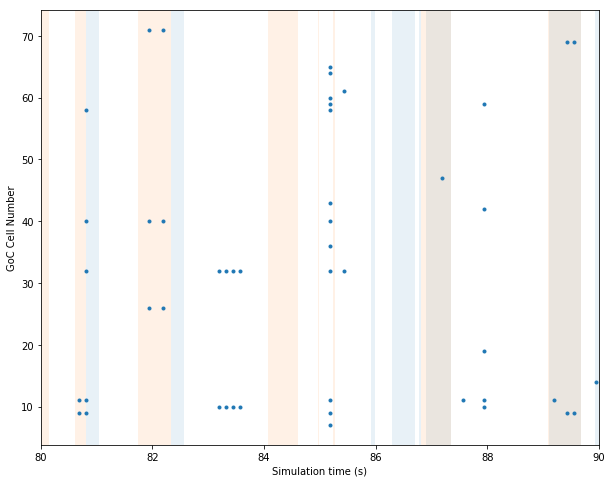

In [19]:
init_time = simulation.current_time - 10.0
end_time = simulation.current_time
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = range(simulation.config_options['stimulation']['number_of_patterns'])
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(10,8))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)

selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
colorlist = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
for pat_id in pattern_id:
    for idx in index[:-1]:
        if simulation.pattern_generator.bin_is_in_pattern[idx+1,pat_id]:
            plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor=colorlist[pat_id], alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

[4.68000e-02 4.70000e-02 4.70000e-02 ... 7.46906e+01 8.08142e+01
 8.51887e+01] [ 9 19 49 ... 68 58 58]
Average spike per oscillatory cycle: 0.03594328703703704 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

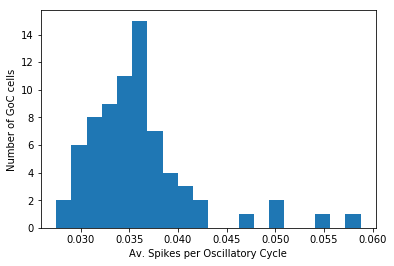

In [10]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-300, 
                                                          end_time = simulation.current_time)
print gtime, gcell_id
import numpy
firing_frequency = numpy.bincount(gcell_id) / (300.0*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GoC

Number of active synapses MF-GoC: 99210
Weight sum histogram MF-GoC: 99210


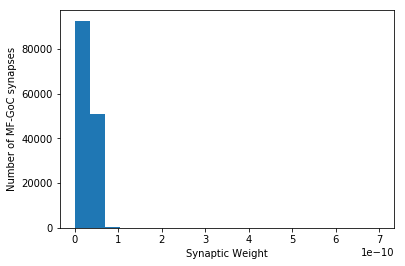

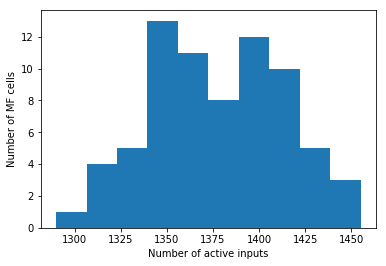

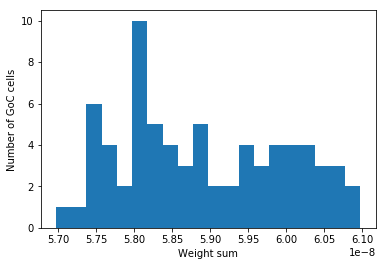

In [11]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,simulation.config_options['mfgocsynapsis']['max_weight']))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

Text(0.5,1,u'Weight vs Pattern Activation')

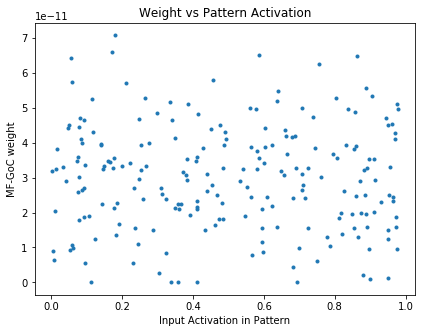

In [12]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index==3
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

Text(0.5,0,u'Number of MF cells')

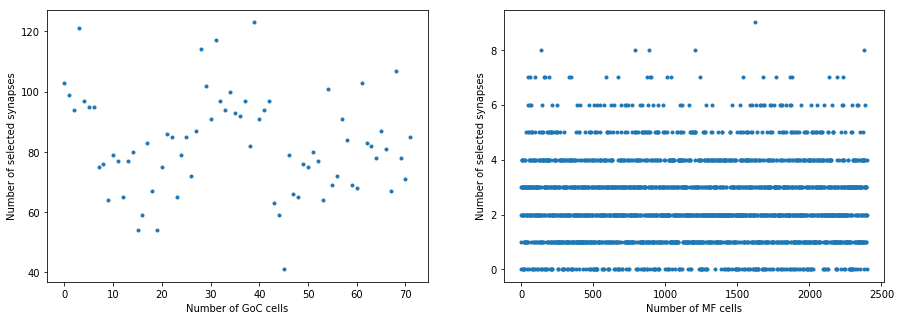

In [13]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [14]:
simulation.analyze_av_MI()

2018-07-03 15:57:58,869 - P3620 - MemTotal:438M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-03 15:57:58,873 - P3620 - MemTotal:438M - Simulation - INFO: Analyzing mutual information from time 80.0 to 90.0 seconds
2018-07-03 15:57:58,875 - P3620 - MemTotal:438M - Simulation - INFO: Average firing rate in MI analysis: 0.06666666666666667Hz
2018-07-03 15:57:58,878 - P3620 - MemTotal:438M - Simulation - INFO: Individual pattern hit matrix:
2018-07-03 15:57:58,879 - P3620 - MemTotal:438M - Simulation - INFO: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.14285714 0.         0.07142857
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         

2018-07-03 15:57:58,900 - P3620 - MemTotal:438M - Simulation - DEBUG: Average MI of individual cells: [0.00321739 0.00560729]
2018-07-03 15:57:58,901 - P3620 - MemTotal:438M - Simulation - INFO: Mutual information
2018-07-03 15:57:58,903 - P3620 - MemTotal:438M - Simulation - INFO: [0.00321739 0.00560729]
2018-07-03 15:57:58,904 - P3620 - MemTotal:438M - Simulation - INFO: Theoretical maximum of MI
2018-07-03 15:57:58,906 - P3620 - MemTotal:438M - Simulation - INFO: [0.66901584 0.81127812]


[array([0.00480913, 0.00691168])]

In [15]:
a = simulation.analyze_Hits_Top()

2018-07-03 15:57:58,964 - P3620 - MemTotal:438M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-03 15:57:58,968 - P3620 - MemTotal:438M - Simulation - INFO: Average firing rate in MI analysis: 0.06666666666666667Hz
2018-07-03 15:57:58,971 - P3620 - MemTotal:438M - Simulation - INFO: Individual pattern hit matrix:
2018-07-03 15:57:58,972 - P3620 - MemTotal:438M - Simulation - INFO: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.14285714 0.         0.07142857
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.07142857
  0.         0.         0.         0.         0.         0.
  0.         0.         0.  

### Mutual Information analysis for each neuron and each pattern

Analyze the pattern corresponding to each time bin

In [16]:
inv_time_bin = 1./time_bin
pattern_index = range(0,simulation.config_options['stimulation']['number_of_patterns'])
cell_index = range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer'))        
# Generate the time bin matrix
total_time = simulation.pattern_generator.simulation_time
bin_time_init = numpy.linspace(0.0, total_time-time_bin, num=total_time*inv_time_bin)
bin_time_end = numpy.linspace(time_bin,total_time,num=total_time*inv_time_bin)

# Initialize a matrix
num_patterns = len(pattern_index)
num_bins = len(bin_time_init)
num_cells = len(cell_index)

# Calculate the time of each pattern interval
time_end_of_pattern = simulation.pattern_generator.pattern_length_cum
time_init_of_pattern = numpy.append([0.0],time_end_of_pattern[:-1])

# Calculate the bin of each pattern interval. Check the round of the last bin to avoid out of range
bin_end_of_pattern = numpy.floor(time_end_of_pattern * inv_time_bin).astype(int)
if (bin_end_of_pattern[-1]>=num_bins):
    bin_end_of_pattern[-1]=num_bins-1
bin_init_of_pattern = numpy.append([0],bin_end_of_pattern[:-1])
if (bin_init_of_pattern[-1]>=num_bins):
    bin_init_of_pattern[-1]=num_bins-1

# Final matrix indicating which bins are considered of each pattern
bin_is_pattern = numpy.empty((num_patterns, num_bins),dtype='bool')
bin_is_pattern[:,:] = False
bin_pattern = numpy.zeros(num_bins)

# Final matrix indicating which bins are registered spikes
bin_has_fired = numpy.empty((num_cells, num_bins), dtype='bool')
bin_has_fired[:,:] = False

for key, value in enumerate(pattern_index):
    time_of_pattern_in_bin = numpy.zeros(num_bins)
    for index in simulation.pattern_generator.pattern_id_index[value]:
        init_bin = bin_init_of_pattern[index]
        end_bin = bin_end_of_pattern[index]

        list_of_bins = range(init_bin,end_bin+1)

        # Add the time of the initial bin (if exists)
        if init_bin!=end_bin:
            time_of_pattern_in_bin[list_of_bins[0]] += (bin_time_end[init_bin] - time_init_of_pattern[index])

        # Add the time of the intermediate bins (if exist)
        time_of_pattern_in_bin[list_of_bins[1:-1]] += time_bin

        # Add the time of the final bin
        time_of_pattern_in_bin[list_of_bins[-1]] += (time_end_of_pattern[index] - max(time_init_of_pattern[index],bin_time_init[end_bin]))

    # Those bins where the time in the pattern is longer than half of the bin are set to part of that pattern    
    bin_is_pattern[key,time_of_pattern_in_bin>(time_bin/2.)] = True
    bin_pattern[bin_is_pattern[key,:]] = bin_pattern[bin_is_pattern[key,:]] + 2**value

    
# Create a map of cells to index
cell_map = dict()
for key, value in enumerate(cell_index):
    cell_map[value] = key

pynest:6: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
pynest:7: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [17]:
def calc_Entropy(bin_matrix):
    '''
    Calculate the entropy for each individual pattern.
    @param bin_matrix Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    sum_bins = numpy.count_nonzero(bin_matrix,axis=1)
    probability = sum_bins/float(bin_matrix.shape[1])
    entropy = numpy.zeros(probability.shape)
    idx = probability>0.0
    entropy[idx] = -probability[idx]*numpy.log2(probability[idx])
    idx = probability<1.0
    entropy[idx] -= (1-probability[idx])*numpy.log2(1-probability[idx])
    return entropy


def calc_Joint_Entropy(cell_firing, pattern_present):
    '''
    Calculate the entropy of having both cell firing and pattern present.
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(pattern.shape[0])
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(pattern.shape[0])
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(pattern.shape[0])
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(pattern.shape[0])
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'
    
    entropy = numpy.zeros((len(pattern_present),len(cell_firing)),dtype=numpy.float)           
    idx = hit_matrix>0
    entropy[idx] = -hit_matrix[idx]*numpy.log2(hit_matrix[idx])
    idx = cr_matrix>0
    entropy[idx] -= cr_matrix[idx]*numpy.log2(cr_matrix[idx])
    idx = miss_matrix>0
    entropy[idx] -= miss_matrix[idx]*numpy.log2(miss_matrix[idx])
    idx = fa_matrix>0
    entropy[idx] -= fa_matrix[idx]*numpy.log2(fa_matrix[idx])
    return entropy

def calc_Ind_Pattern_Hit_Matrix(cell_firing, pattern_present):
    '''
    Calculate the correct rejection, hit, miss and false alarm matrisses with 1 line for each cell and 1 column for each pattern (including noise).
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(numpy.count_nonzero(pattern))
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(numpy.count_nonzero(~pattern))
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(numpy.count_nonzero(pattern))
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(numpy.count_nonzero(~pattern))
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'               
        
    return cr_matrix, hit_matrix, miss_matrix, fa_matrix 
    
def calc_MI(pattern_entropy, cell_entropy, joint_entropy):
    '''
    Calculate the MI between the pattern in the input and each neuron.
    @param pattern_entropy Array with the entropy of each individual pattern.
    @param cell_entropy Array with the entropy of each individual cell.
    @param joint_entropy 2D array with the joint entropy of each cell to each pattern
    '''
    
    MI_matrix = numpy.empty((len(pattern_entropy),len(cell_entropy)))

    for index_pat, pattern_H in enumerate(pattern_entropy):
        MI_matrix[index_pat,:] = pattern_H + cell_entropy[:] - joint_entropy[index_pat,:]

    return MI_matrix

In [18]:
if simulation.current_time<analysis_time:
    init_time = 0
else:
    init_time = simulation.current_time - analysis_time
print init_time, simulation.current_time
       
# Load data from the data provider
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', 
                                                          init_time = init_time, end_time = simulation.current_time)
spike_bin_index = numpy.floor(gtime*inv_time_bin).astype(int)

av_firing_rate = float(len(gtime))/(len(cell_index)*(simulation.current_time-init_time)*8)
print 'Average firing rate in MI analysis:',av_firing_rate,'Hz'
        
cell_id = numpy.array([cell_map[value] for value in gcell_id])
        
# Final matrix indicating which bins are registered spikes
if len(spike_bin_index) and len(cell_id):
    bin_has_fired[cell_id,spike_bin_index] = True
    
# Calculate mutual information in the time window
init_bin = int(init_time * inv_time_bin)
end_bin = int(simulation.current_time * inv_time_bin)

cr_matrix, hit_matrix, miss_matrix, fa_matrix = calc_Ind_Pattern_Hit_Matrix(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

# Obtain the list of neurons with hit rate over 80%
hit_rate_thr = 0.80
neurons_over = numpy.where(hit_matrix>hit_rate_thr)
print 'List of neurons with hit rate over',hit_rate_thr,'. Number of neurons:',neurons_over[0].shape,'. Pattern:',neurons_over[0],'Neuron:',neurons_over[1]
        
# Calculate pattern entropy, cell entropy and joint entropy
pat_entropy = calc_Entropy(bin_is_pattern[:,init_bin:end_bin])
cell_entropy = calc_Entropy(bin_has_fired[:,init_bin:end_bin])
joint_entropy = calc_Joint_Entropy(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

# Calculate average MI
MI_Matrix = calc_MI(pat_entropy, cell_entropy, joint_entropy)

selected_pattern = numpy.argmax(MI_Matrix, axis=0)

print 'Pattern id with maximum MI for each neuron:',selected_pattern
MI_per_pattern = 0
for idx in range(num_patterns):
    sel_columns = selected_pattern==idx
    MI_per_pattern += numpy.average(MI_Matrix[idx,sel_columns])
av_MI_per_pattern = MI_per_pattern/num_patterns
print 'Average MI per pattern:',av_MI_per_pattern

80.0 90.0
Average firing rate in MI analysis: 0.008333333333333333 Hz
List of neurons with hit rate over 0.8 . Number of neurons: (0,) . Pattern: [] Neuron: []
Pattern id with maximum MI for each neuron: [0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1]
Average MI per pattern: 0.010499439592839548
